## BIRD calls

__GOAL__:Using the BIRD calls on the K562 data as the y_expected to test against y_predicted from BlueSTARR.
- Need to format the BIRD calls to match the reddy lab test data
- [BILL] p-reg > 0.9 is considered positive and p-reg < 0.3 is considered neagtive. Discard everything in between
- Output format for BIRD calls: VariantID, effect_size(theta), lowerCI, upperCI, p-reg, ref_allele, alt_allele

BIRD output path given by Bill: `/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt`

In [32]:
import pandas as pd


bird_calls = pd.read_csv('/hpc/home/rv103/igvf/kd259/BIRD_files/BIRD_output.K562.2024_07_18.txt', sep='\t', names=['variantID','effect_size','lowerCI','upperCI','p_reg'])
bird_calls_v1 = bird_calls[(bird_calls['p_reg']>0.9) | (bird_calls['p_reg']<0.3)]

# bird_calls_v1[['chrom','Position']] = bird_calls['variantID'].str.split('@', expand=True)
# bird_calls_v1['begin'] = bird_calls_v1['Position'].astype(int)-150
# bird_calls_v1['end'] = bird_calls_v1['Position'].astype(int)+150
# bird_calls_v1.to_csv('/hpc/group/igvf/revathy/Blueplots/data/Bird_calls_pred_subset.txt', sep='\t', index=False, header=None)
bird_calls_v1

,variantID,effect_size,lowerCI,upperCI,p_reg
0,chr10:100000235:C:T,1.043100,0.649137,1.94043,0.230
2,chr10:100000512:G:A,1.036705,0.651770,2.22437,0.257
3,chr10:100000979:T:C,0.955819,0.263771,1.54118,0.265
4,chr10:100001014:C:T,0.999012,0.395801,1.86326,0.167
7,chr10:100002628:A:C,0.938036,0.446718,1.23344,0.263
...,...,...,...,...,...
6809417,chr9:99996533:C:CT,1.012295,0.613731,2.30711,0.211
6809418,chr9:99996889:GTGTATGTGTATATATATACATATATATATAT...,0.992146,0.503159,2.22220,0.161
6809419,chr9:99996993:G:GTA,0.966696,0.288223,1.68451,0.278
6809421,chr9:99998283:G:C,0.995644,0.576231,1.62200,0.142


In [4]:
predictions = pd.read_csv('/hpc/home/rv103/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions.tsv', sep='\t')
predictions

,ID,window,pos,ref,allele,prediction
0,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,T,0.434380
1,chr1@247331106,chr1:247330955-247331255,pos=247331106,ref=C,T,-0.001110
2,chr1@18784160,chr1:18784009-18784309,pos=18784160,ref=A,G,0.116354
3,chr1@26410208,chr1:26410057-26410357,pos=26410208,ref=T,C,0.308035
4,chr1@213399603,chr1:213399452-213399752,pos=213399603,ref=C,A,-0.078271
...,...,...,...,...,...,...
11397,chr22@25750233,chr22:25750082-25750382,pos=25750233,ref=G,A,-0.170864
11398,chr22@18001741,chr22:18001590-18001890,pos=18001741,ref=T,C,0.125861
11399,chr22@18001294,chr22:18001143-18001443,pos=18001294,ref=A,G,0.225918
11400,chr22@17531499,chr22:17531348-17531648,pos=17531499,ref=T,G,-0.233495


In [10]:
pred_variants = list(predictions['ID'].unique())
bird_calls_v1[~bird_calls_v1['variantID'].isin(pred_variants)]

,variantID,effect_size,lowerCI,upperCI,p_reg,ref,alt,chrom,Position,begin,end
0,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C,chr1,169611479,169611329,169611629
2,chr1@54715546,1.036010,0.683889,2.26155,0.264,C,A,chr1,54715546,54715396,54715696
8,chr1@41902204,1.009840,0.615032,1.81321,0.155,C,T,chr1,41902204,41902054,41902354
9,chr1@25569530,0.993991,0.621267,1.53276,0.143,A,G,chr1,25569530,25569380,25569680
10,chr1@51379106,0.985421,0.467731,1.68631,0.196,G,C,chr1,51379106,51378956,51379256
...,...,...,...,...,...,...,...,...,...,...,...
342752,chr22@32122143,1.049750,0.708258,2.96895,0.292,C,T,chr22,32122143,32121993,32122293
342753,chr22@33052666,0.993895,0.558812,1.61425,0.143,T,C,chr22,33052666,33052516,33052816
342755,chr22@42686472,0.977924,0.604466,1.47017,0.150,G,C,chr22,42686472,42686322,42686622
342756,chr22@25753842,1.003320,0.657668,1.49335,0.131,G,A,chr22,25753842,25753692,25753992


In [1]:
%%bash
cd /hpc/group/igvf/K562/full-set/300bp/data-normalized 
zcat test.fasta.gz | head

>9 /coord=chr22:10699550-10699850
CCTAGCCGCCCTGGCTTTTTAACCCTGCCGCCGAGGCTTTTTGCCCCCAGCGCTATGGCT
TTTTGACCGCGCCGCCCAGGCTTTTTGCTGCCGCGGCTTTCTGCCCCCGCCGCCGCGGCT
TTTTGCCCCCGCGGCTTTTTTGCCCCCGCGGCTTTTTTGCCCCGTCTCAGCGGCTTTTTG
CTGCCGTGGCATTTTGCCCCCGCCGTTGTGGCTTTTTGCCCCCCGCTGCCGTGGCTTTTT
GCCCCCGCCGCCGCGGCTTTTGCGCATTTTTGCCCCCGCCGTCGCGGCTTTTTGCCCCCG
>104 /coord=chr22:10717400-10717700
TAAATTCGAGTCCATTCCATTCCATTCCATTCCATTTCATTCGAGTCCCTTTCATTCCGT
TCCATTCAATTCGAGTCCATTCCTTACCATTACATTCCGTTCGACTTGAGTCCATTCCAT
TCCATTCCATTCCATTCGAATCCATTCCACTCTATTCCATTCAAGTCAAATCCATTCCAT


In [2]:
### change the format of the BIRD calls to the one that matches the Kircher_region_chunk.txt file. 
### This can be done by referring to /hpc/home/rv103/igvf/K562/mdl_eval/BlueSTARR_vs_DeltaSVM/get_Kircher_chunks.ipynb

## This exact code produces the prediction chunk which extracts the sequence in the region and lists the ref and the alts is given below
### need to extract 300bp sequences for the positions in the BIRD calls - extend the position 150 to the left and 150 to the right to get the regions


def loadFasta(fasta_path, as_dict=False,uppercase=False, stop_at=None,
              revcomp=False):
    fastas = []
    seq = None
    header = None
    for r in (gzip.open(fasta_path) if fasta_path.endswith(".gz") else open(fasta_path)):
        if type(r) is bytes: r = r.decode("utf-8")
        r = r.strip()
        if r.startswith(">"):
            if seq != None and header != None:
                fastas.append([header, seq])
                if stop_at != None and len(fastas) >= stop_at:
                    break
            seq = ""
            header = r[1:]
        else:
            if seq != None:
                seq += r.upper() if uppercase else r
            else:
                seq = r.upper() if uppercase else r
    if stop_at != None and len(fastas) < stop_at:
        fastas.append([header, seq])
    elif stop_at == None:
        fastas.append([header, seq])
    if as_dict:
        return {h: s for h, s in fastas}
    if(revcomp):
        for rec in fastas:
            rc=generate_complementary_sequence(rec[1])
            rec[1]=rec[1]+"NNNNNNNNNNNNNNNNNNNN"+rc
    return pd.DataFrame({'location': [e[0] for e in fastas],
                         'sequence': [e[1] for e in fastas]})




In [8]:
fasta = loadFasta('/hpc/home/rv103/igvf/K562/mdl_eval/BlueSTARR_vs_DeltaSVM/Kircher_entire_regions/Kircher_region.fasta')



In [9]:
fasta

,location,sequence
0,chr11:5226964-5227264,CACCTTGCCCCACAGGGCAGTAACGGCAGACTTCTCCTCAGGAGTC...
1,chr11:5249791-5250091,TGAAATGACCCATGGCGTCTGGACTAGGAGCTTATTGATAACCTCA...
2,chr20:44355511-44355811,TCCCCTAACCCCAGAGTGCAGGACTAGGACCCGAGTGGACCTCAGG...
3,chr5:1294967-1295267,GGCAGCGGGGAGCGCGCGGCATCGCGGGGGTGGCCGGGGCCAGGGC...
4,chr8:127519269-127519569,GGTAAGTCAACATGAAATTATAAACCATGTTTAACTAACCCACAAG...
5,chr8:127519432-127519732,AGAGGAAAAAAATAAATAAAAAGGCATATGTGTTGAAAGGAAGAAA...
6,chr10:112998239-112998539,AGGTTCTGTTTCTTGCTTAGTCACTTTCTGTTTGAACAAAATTGGA...
7,chr10:112998389-112998689,GCACATGTGAAAGAAAAAGGGAGAAAGCAGGATTGAGCAGGGGGAG...
8,chr10:112998539-112998839,GCACAGCTGTTATTTACTGAACAATTAGAGAGCTAAGCACTTTTTA...
9,chrX:139530462-139530762,GTCCCACTGATGAACTGTGCTGCCACAGTAAATGTAGCCACTATGC...


In [ ]:
# make prediction chunks
outFile = open(OUT,"wt")
count = 0
for i in range(len(all)):
    localEnd = int(all.loc[i, 'local_end'])
    localBegin = int(all.loc[i, 'local_begin'])
    begin = all.loc[i, 'begin']
    end = all.loc[i, 'end']
    seq = fasta.loc[i, 'sequence']
    head = all.loc[i, 'chrom']+":"+str(all.loc[i, 'old_begin'])+"-"+str(all.loc[i, 'old_end'])+'\t'

    for i in range(0,localEnd-localBegin):
        head+=str(begin+i)+':ref='+seq[localBegin+i]+':'+','.join([x for x in ALPHA])+'\t'
        count += 1
    print(head,file=outFile)

In [3]:
pd.read_parquet('/hpc/home/rv103/igvf/revathy/db/Kircher-2019_K562-BIRD.parquet')

,chrom,cre_start,cre_end,bin_chrom,bin_start,bin_end,allele_pos,ref_allele,allele,effect,log2FC
0,chr7@34199767,chr7,34199616,34199916,pos,34199767,T,0.10298766195774078,None,0.102988,NaN
1,chr7@66353659,chr7,66353508,66353808,pos,66353659,T,None,0.0353672131896019,-0.035367,NaN
2,chr7@18577947,chr7,18577796,18578096,pos,18577947,A,None,0.27362874150276184,-0.273629,NaN
3,chr7@157117726,chr7,157117575,157117875,pos,157117726,T,0.09723028540611267,None,0.097230,NaN
4,chr7@132892843,chr7,132892692,132892992,pos,132892843,A,None,0.2994316816329956,-0.299432,NaN
...,...,...,...,...,...,...,...,...,...,...,...
131451,chr7@67969213,chr7,67969062,67969362,pos,67969213,C,0.9564551115036011,None,0.956455,NaN
131452,chr7@5685324,chr7,5685173,5685473,pos,5685324,G,0.06727825105190277,None,0.067278,NaN
131453,chr7@92988005,chr7,92987854,92988154,pos,92988005,T,None,0.1448039710521698,-0.144804,NaN
131454,chr7@106358257,chr7,106358106,106358406,pos,106358257,C,None,0.02146163582801819,-0.021462,NaN


# ROC curve for BlueSTARR predictions with BIRD calls as test data

#### DID NOT USE INPUT COUNTS TO THRESHOLD THE BIRD COUNTS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import namedtuple
from sklearn.metrics import roc_curve, roc_auc_score, auc
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20
sns.set_context('talk')
%matplotlib inline


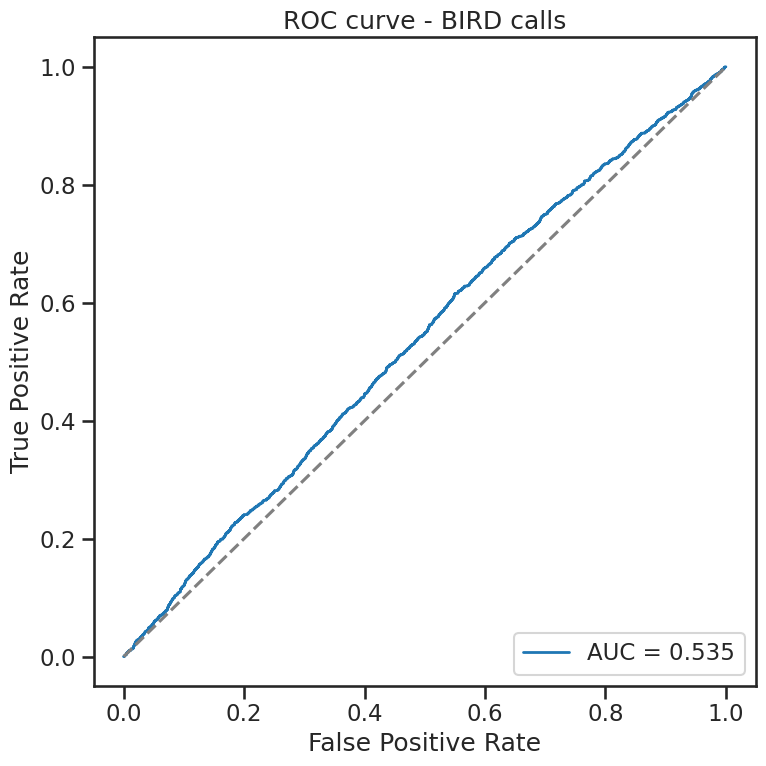

AUC: 0.5352  |  N=131456 (positives=1528.0, negatives=129928.0)


In [25]:

pred_path = "/hpc/group/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions.tsv"     
bird_path = "/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt"  

pred = pd.read_csv(pred_path, sep="\t")


if pred["pos"].dtype == object:
    pred["pos_num"] = pred["pos"].astype(str).str.replace("pos=", "", regex=False).astype(int)

try:
    bird = pd.read_csv(bird_path, sep="\t", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])
except Exception:
    bird = pd.read_csv(bird_path, sep=r"\s+", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])


bird_cols = {c.lower(): c for c in bird.columns}

variant_col = bird_cols.get("variantid", "VariantID")
theta_col   = bird_cols.get("theta", "theta")
preg_col    = next((bird_cols[k] for k in bird_cols if k in {"p-reg","preg","p_reg"}), None)


df = pred.merge(bird, left_on="ID", right_on=variant_col, how="inner")
df['exp_pred'] = np.exp(df['prediction'])

y_true = np.where(df["p-reg"] > 0.9, 1, np.where(df["p-reg"] < 0.3, 0, np.nan))


y_score = df["exp_pred"].astype(float).values


mask = np.isfinite(y_score) & np.isfinite(y_true)
y_true = y_true[mask]
y_score = y_score[mask]

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# === Plot ===
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve - BIRD calls")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"AUC: {roc_auc:.4f}  |  N={len(y_true)} (positives={y_true.sum()}, negatives={(1-y_true).sum()})")


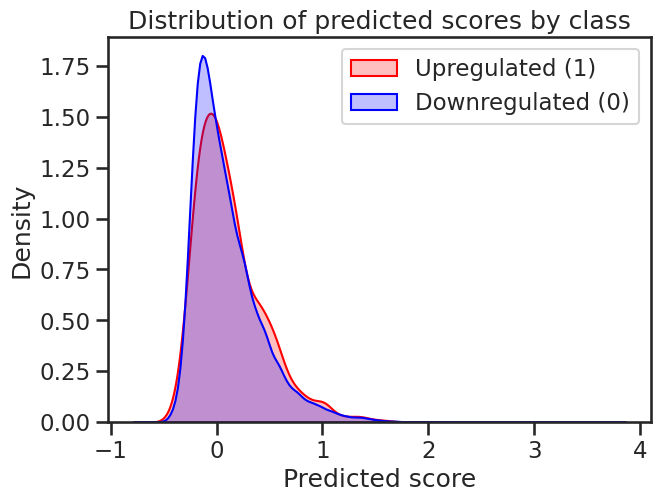

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.kdeplot(x=y_score[y_true==1], fill=True, color="red", label="Upregulated (1)")
sns.kdeplot(x=y_score[y_true==0], fill=True, color="blue", label="Downregulated (0)")
plt.xlabel("Predicted score")
plt.ylabel("Density")
plt.title("Distribution of predicted scores by class")
plt.legend()
plt.show()




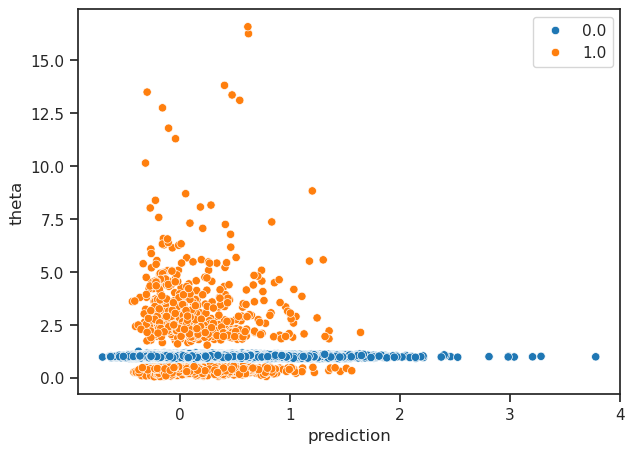

In [63]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='prediction', y='theta', hue='label')
# plt.xlabel("Predicted score")
# plt.ylabel("Density")
# plt.title("Distribution of predicted scores by class")
plt.legend()
plt.show()

# BIRD vs BlueSTARR - adding the raw counts also as a threshold

In [14]:
import pandas as pd

# bird_calls_v1 = bird_calls[(bird_calls['p_reg']>0.9) | (bird_calls['p_reg']<0.3)]

input_counts = pd.read_csv('/hpc/home/rv103/igvf/revathy/Blueplots/data/snp_sites.POOL1_K562_mergedPeaks.BIRDcounts.txt', sep='\t')

input_counts['sum_output'] = input_counts.loc[:, input_counts.columns.str.contains('output')].sum(axis=1)
input_counts['sum_input'] = input_counts.loc[:, input_counts.columns.str.contains('input')].sum(axis=1)
input_counts.rename(columns={'Unnamed: 0':'variantID'}, inplace=True)
input_counts

,variantID,output3_ref,output3_alt,output2_ref,output2_alt,output1_ref,output1_alt,input3_ref,input3_alt,input2_ref,input2_alt,input1_ref,input1_alt,sum_output,sum_input
0,chr10@100006344,28,2,22,2,29,5,36,5,18,3,12,1,88,75
1,chr10@100006504,27,0,24,5,33,0,34,5,20,3,19,0,89,81
2,chr10@100006605,14,6,17,5,35,2,24,10,20,4,19,2,79,79
3,chr10@100006780,6,4,5,8,12,8,17,9,10,5,8,7,43,56
4,chr10@100009580,13,1,25,5,17,1,43,1,35,2,31,3,62,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342753,chr9@99988747,1,13,0,13,0,29,1,22,2,21,1,22,56,69
342754,chr9@99988906,17,1,8,4,31,4,23,3,32,5,32,4,65,99
342755,chr9@99989210,2,16,1,15,2,26,4,27,1,38,3,21,62,94
342756,chr9@99989251,20,0,15,4,23,2,28,5,38,2,25,3,64,101


In [15]:
bird_calls = pd.read_csv('/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt', sep='\t', names=['variantID','effect_size','lowerCI','upperCI','p_reg','ref','alt'])

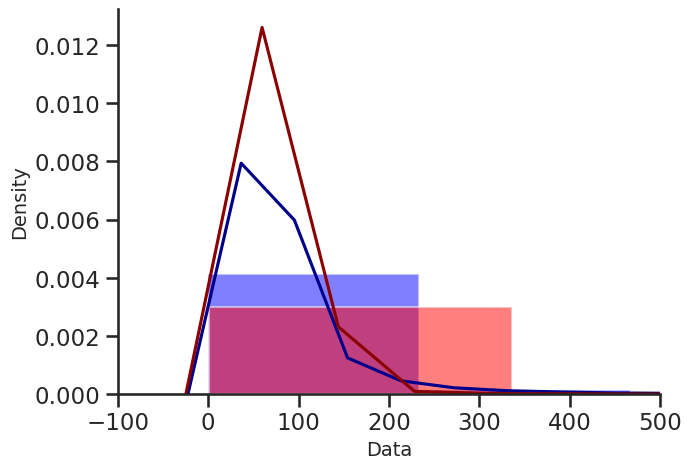

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.hist(input_counts['sum_output'], density=True, bins=50, alpha=0.5,  color='blue', label="RNA counts")
plt.hist(input_counts['sum_input'], density=True, bins=50, alpha=0.5, color='red', label="DNA counts")
sns.kdeplot(input_counts['sum_output'], color='darkblue')
sns.kdeplot(input_counts['sum_input'], color='darkred')

plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.xlim(-100,500)
# plt.legend(loc='upper right')
sns.despine()
plt.show()

In [16]:
bird_counts = bird_calls.merge(input_counts, on='variantID', how='inner')
# bird_counts_v1 = bird_counts[(bird_counts['p_reg']>0.9) | (bird_counts['p_reg']<0.1)]
lower_threshold = (bird_counts['p_reg']<0.3) & (bird_counts['sum_output']>50) 
bird_counts[lower_threshold]

,variantID,effect_size,lowerCI,upperCI,p_reg,ref,alt,output3_ref,output3_alt,output2_ref,...,output1_ref,output1_alt,input3_ref,input3_alt,input2_ref,input2_alt,input1_ref,input1_alt,sum_output,sum_input
0,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C,30,10,29,...,48,3,23,5,19,4,18,2,124,71
2,chr1@54715546,1.036010,0.683889,2.26155,0.264,C,A,29,3,26,...,27,4,39,0,38,3,23,3,91,106
8,chr1@41902204,1.009840,0.615032,1.81321,0.155,C,T,37,4,27,...,48,6,28,4,33,2,28,1,124,96
9,chr1@25569530,0.993991,0.621267,1.53276,0.143,A,G,12,23,3,...,6,34,6,27,8,23,3,20,97,87
10,chr1@51379106,0.985421,0.467731,1.68631,0.196,G,C,1,18,1,...,5,39,0,19,2,29,1,10,92,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342751,chr22@26860625,1.044770,0.658658,1.88651,0.216,T,C,26,18,24,...,30,20,16,8,11,5,15,7,128,62
342752,chr22@32122143,1.049750,0.708258,2.96895,0.292,C,T,2,28,1,...,0,24,2,38,3,39,3,32,68,117
342753,chr22@33052666,0.993895,0.558812,1.61425,0.143,T,C,16,0,11,...,20,5,24,8,28,2,11,6,58,79
342756,chr22@25753842,1.003320,0.657668,1.49335,0.131,G,A,18,7,27,...,27,1,30,7,40,3,22,4,84,106


In [17]:
bird_counts_subset = bird_counts[(bird_counts['p_reg']>0.9) | lower_threshold]
bird_counts_subset[['chr','pos']]=bird_counts_subset['variantID'].str.split('@', expand=True)

bird_counts_subset2 = bird_counts_subset[['variantID','ref','alt']]
df_ref = bird_counts_subset2.copy()
df_ref['alt'] = df_ref['ref']

bird_counts_with_ref = pd.concat([bird_counts_subset2,df_ref], ignore_index=True)
bird_counts_with_ref.to_csv('/hpc/group/igvf/revathy/Blueplots/data/Bird_calls_pred_subset_count50.txt', sep='\t', index=False, header=None)

# bird_counts_subset2[['variantID','effect_size','lowerCI','upperCI','p_reg','ref','alt']].to_csv('/hpc/group/igvf/revathy/Blueplots/data/Bird_calls_pred_subset_v1.txt', sep='\t', index=False, header=None)

/tmp/ipykernel_65711/3250511499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_counts_subset[['chr','pos']]=bird_counts_subset['variantID'].str.split('@', expand=True)
/tmp/ipykernel_65711/3250511499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_counts_subset[['chr','pos']]=bird_counts_subset['variantID'].str.split('@', expand=True)


In [18]:
!wc -l /hpc/group/igvf/revathy/Blueplots/data/Bird_calls_pred_subset_count50.txt

355830 /hpc/group/igvf/revathy/Blueplots/data/Bird_calls_pred_subset_count50.txt


## BIRD vs BlueSTARR predictions ROC plot

### Input count sum >100 for BIRD calls

In [2]:
!head /hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt

chr1@169611479	0.970021	0.515223	1.44216	0.185	T	C
chr1@4120578	0.5966549999999999	0.19431	1.07708	0.701	T	C
chr1@54715546	1.03601	0.683889	2.26155	0.264	C	A
chr1@10948665	1.54116	0.787323	5.30159	0.67	G	A
chr1@112394506	1.187905	0.825253	3.09154	0.458	T	C
chr1@112700426	1.2843200000000001	0.846685	3.52009	0.521	C	T
chr1@243056930	1.188015	0.841489	2.59744	0.449	T	C
chr1@154666350	0.7911334999999999	0.324563	1.18396	0.512	A	G
chr1@41902204	1.00984	0.615032	1.81321	0.155	C	T
chr1@25569530	0.9939910000000001	0.621267	1.53276	0.143	A	G


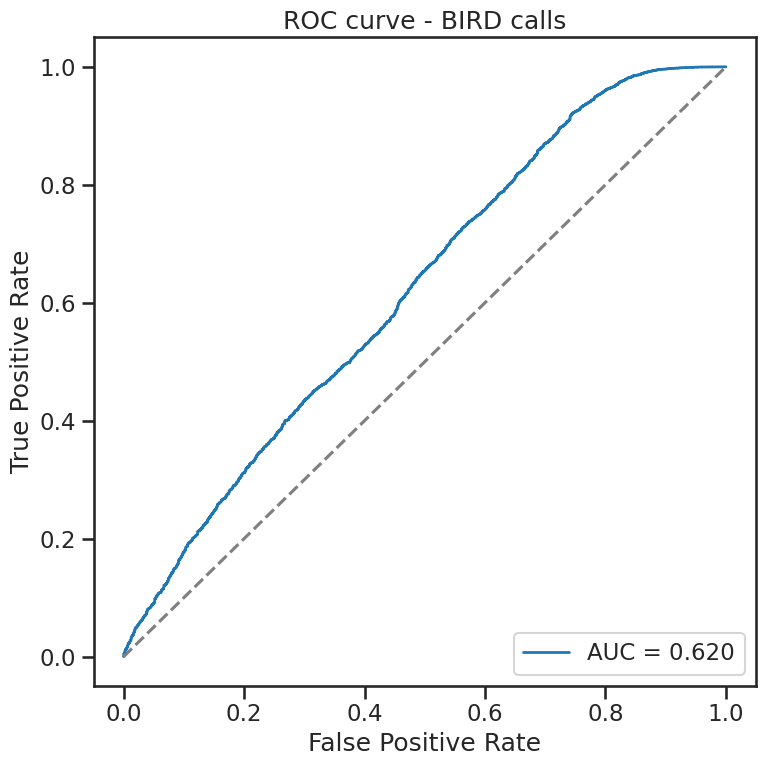

AUC: 0.6201  |  N=53781 (positives=52014.0, negatives=1767.0)


In [13]:
pred_path = "/hpc/group/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions_v1.tsv"     
bird_path = "/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt"  

pred = pd.read_csv(pred_path, sep="\t")

if pred["pos"].dtype == object:
    pred["pos_num"] = pred["pos"].astype(str).str.replace("pos=", "", regex=False).astype(int)

try:
    bird = pd.read_csv(bird_path, sep="\t", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])
except Exception:
    bird = pd.read_csv(bird_path, sep=r"\s+", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])


bird_cols = {c.lower(): c for c in bird.columns}

variant_col = bird_cols.get("variantid", "VariantID")
theta_col   = bird_cols.get("theta", "theta")
preg_col    = next((bird_cols[k] for k in bird_cols if k in {"p-reg","preg","p_reg"}), None)


df = pred.merge(bird, left_on="ID", right_on=variant_col, how="inner")

ref_map = (df.loc[df['allele'].eq(df['ref_y']), ['ID', 'prediction']]
             .drop_duplicates('ID')
             .set_index('ID')['prediction'])


df['ref_pred']  = df['ID'].map(ref_map)
df['pred_diff'] = df['prediction'] - df['ref_pred']   
df['log_pred_diff'] = np.exp(df['pred_diff'])

### prediction is log scale but theta is raw scores

out = df.loc[df['allele'].ne(df['ref_y']) & df['ref_pred'].notna()].copy()


y_true = np.where(out["theta"] > 0.9, 1, np.where(out["theta"] <= 0.9, 0, np.nan))

y_score = out["log_pred_diff"].astype(float).values


mask = np.isfinite(y_score) & np.isfinite(y_true)
y_true = y_true[mask]
y_score = y_score[mask]

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# === Plot ===
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve - BIRD calls")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"AUC: {roc_auc:.4f}  |  N={len(y_true)} (positives={y_true.sum()}, negatives={(1-y_true).sum()})")


### Input Counts sum thresold > 50

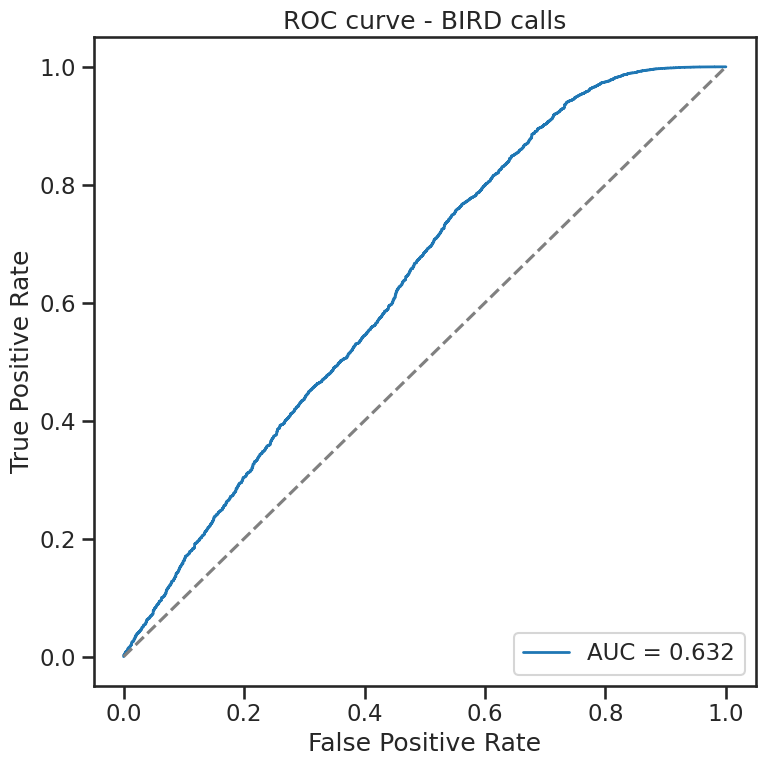

AUC: 0.6319  |  N=177909 (positives=176237.0, negatives=1672.0)


In [20]:
pred_path = "/hpc/group/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions_count50.tsv"     
bird_path = "/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt"  

pred = pd.read_csv(pred_path, sep="\t")

if pred["pos"].dtype == object:
    pred["pos_num"] = pred["pos"].astype(str).str.replace("pos=", "", regex=False).astype(int)

try:
    bird = pd.read_csv(bird_path, sep="\t", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])
except Exception:
    bird = pd.read_csv(bird_path, sep=r"\s+", names=['VariantID','theta','lowerCI','upperCI','p-reg','ref','alt'])


bird_cols = {c.lower(): c for c in bird.columns}

variant_col = bird_cols.get("variantid", "VariantID")
theta_col   = bird_cols.get("theta", "theta")
preg_col    = next((bird_cols[k] for k in bird_cols if k in {"p-reg","preg","p_reg"}), None)


df = pred.merge(bird, left_on="ID", right_on=variant_col, how="inner")

ref_map = (df.loc[df['allele'].eq(df['ref_y']), ['ID', 'prediction']]
             .drop_duplicates('ID')
             .set_index('ID')['prediction'])


df['ref_pred']  = df['ID'].map(ref_map)
df['pred_diff'] = df['prediction'] - df['ref_pred']   
df['log_pred_diff'] = np.exp(df['pred_diff'])

### prediction is log scale but theta is raw scores

out = df.loc[df['allele'].ne(df['ref_y']) & df['ref_pred'].notna()].copy()


y_true = np.where(out["theta"] > 0.8, 1, np.where(out["theta"] <= 0.8, 0, np.nan))

y_score = out["log_pred_diff"].astype(float).values


mask = np.isfinite(y_score) & np.isfinite(y_true)
y_true = y_true[mask]
y_score = y_score[mask]

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# === Plot ===
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve - BIRD calls")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"AUC: {roc_auc:.4f}  |  N={len(y_true)} (positives={y_true.sum()}, negatives={(1-y_true).sum()})")


In [66]:

ref_map = (df.loc[df['allele'].eq(df['ref_y']), ['ID', 'prediction']]
             .drop_duplicates('ID')
             .set_index('ID')['prediction'])


df['ref_pred']  = df['ID'].map(ref_map)
df['pred_diff'] = df['prediction'] - df['ref_pred']   

out = df.loc[df['allele'].ne(df['ref_y']) & df['ref_pred'].notna()].copy()
out



# out = out[['VariantID','ID','ref_x','allele','prediction','ref_pred','pred_diff',
#            'window','pos','pos_num','theta','lowerCI','upperCI','p-reg','ref_y','alt','log_theta']]

# out.head()


,ID,window,pos,ref_x,allele,prediction,pos_num,VariantID,theta,lowerCI,upperCI,p-reg,ref_y,alt,log_theta,ref_pred,pred_diff
0,chr1@169611479,chr1:169611328-169611628,pos=169611479,ref=T,C,-0.082146,169611479,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C,-0.030438,-0.096332,0.014185
1,chr1@41902204,chr1:41902053-41902353,pos=41902204,ref=C,T,0.516476,41902204,chr1@41902204,1.009840,0.615032,1.81321,0.155,C,T,0.009792,0.559889,-0.043412
2,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,T,0.434380,71229200,chr1@71229200,0.997793,0.709166,1.35010,0.081,C,T,-0.002209,0.435436,-0.001056
3,chr1@32222433,chr1:32222282-32222582,pos=32222433,ref=A,G,0.997458,32222433,chr1@32222433,0.966017,0.526047,1.40000,0.189,A,G,-0.034573,1.020872,-0.023414
4,chr1@109100220,chr1:109100069-109100369,pos=109100220,ref=C,T,0.653423,109100220,chr1@109100220,0.980143,0.611626,1.60976,0.163,C,T,-0.020057,0.649780,0.003643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53776,chr22@50272381,chr22:50272230-50272530,pos=50272381,ref=T,C,0.075147,50272381,chr22@50272381,0.962927,0.542325,1.34256,0.194,T,C,-0.037778,0.062848,0.012299
53777,chr22@31945040,chr22:31944889-31945189,pos=31945040,ref=T,C,0.501615,31945040,chr22@31945040,1.064915,0.766219,2.11463,0.243,T,C,0.062895,0.510471,-0.008857
53778,chr22@43103997,chr22:43103846-43104146,pos=43103997,ref=A,G,0.190303,43103997,chr22@43103997,0.984248,0.620428,1.34570,0.158,A,G,-0.015877,0.170349,0.019954
53779,chr22@26860625,chr22:26860474-26860774,pos=26860625,ref=T,C,0.411897,26860625,chr22@26860625,1.044770,0.658658,1.88651,0.216,T,C,0.043797,0.422254,-0.010358


In [45]:
df['log_theta'] = np.log(df['theta'])
df

,ID,window,pos,ref_x,allele,prediction,pos_num,VariantID,theta,lowerCI,upperCI,p-reg,ref_y,alt,log_theta
0,chr1@169611479,chr1:169611328-169611628,pos=169611479,ref=T,C,-0.082146,169611479,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C,-0.030438
1,chr1@41902204,chr1:41902053-41902353,pos=41902204,ref=C,T,0.516476,41902204,chr1@41902204,1.009840,0.615032,1.81321,0.155,C,T,0.009792
2,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,T,0.434380,71229200,chr1@71229200,0.997793,0.709166,1.35010,0.081,C,T,-0.002209
3,chr1@32222433,chr1:32222282-32222582,pos=32222433,ref=A,G,0.997458,32222433,chr1@32222433,0.966017,0.526047,1.40000,0.189,A,G,-0.034573
4,chr1@109100220,chr1:109100069-109100369,pos=109100220,ref=C,T,0.653423,109100220,chr1@109100220,0.980143,0.611626,1.60976,0.163,C,T,-0.020057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107557,chr22@50272381,chr22:50272230-50272530,pos=50272381,ref=T,T,0.062848,50272381,chr22@50272381,0.962927,0.542325,1.34256,0.194,T,C,-0.037778
107558,chr22@31945040,chr22:31944889-31945189,pos=31945040,ref=T,T,0.510471,31945040,chr22@31945040,1.064915,0.766219,2.11463,0.243,T,C,0.062895
107559,chr22@43103997,chr22:43103846-43104146,pos=43103997,ref=A,A,0.170349,43103997,chr22@43103997,0.984248,0.620428,1.34570,0.158,A,G,-0.015877
107560,chr22@26860625,chr22:26860474-26860774,pos=26860625,ref=T,T,0.422254,26860625,chr22@26860625,1.044770,0.658658,1.88651,0.216,T,C,0.043797


array([0.00000000e+00, 1.95480491e-05, 6.45085620e-04, ...,
       9.99980452e-01, 9.99980452e-01, 1.00000000e+00])

In [13]:
import pandas as pd
pred = pd.read_csv('/hpc/group/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions_v1.tsv', sep='\t')
pred.sort_values('ID', ascending=True, inplace=True)
pred[pred['ID']=='chr1@71229200']

,ID,window,pos,ref,allele,prediction
2,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,T,0.434380
53783,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,C,0.435436


In [11]:
-0.096332-(-0.082146)

-0.014186000000000004

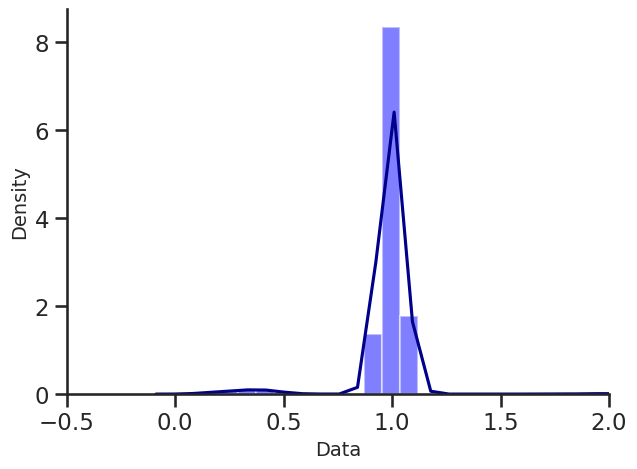

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.hist(df['theta'], density=True, bins=200, alpha=0.5,  color='blue', label="BIRD")
# plt.hist(df['prediction'], density=True, bins=100, alpha=0.5, color='red', label="BlueSTARR")
sns.kdeplot(df['theta'], color='darkblue')
# sns.kdeplot(df['prediction'], color='darkred')

plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.xlim(-0.5,2)
# plt.legend(loc='upper right')
sns.despine()
plt.show()

In [18]:
pred

,ID,window,pos,ref,allele,prediction,pos_num
0,chr1@169611479,chr1:169611328-169611628,pos=169611479,ref=T,C,-0.082146,169611479
1,chr1@41902204,chr1:41902053-41902353,pos=41902204,ref=C,T,0.516476,41902204
2,chr1@71229200,chr1:71229049-71229349,pos=71229200,ref=C,T,0.434380,71229200
3,chr1@32222433,chr1:32222282-32222582,pos=32222433,ref=A,G,0.997458,32222433
4,chr1@109100220,chr1:109100069-109100369,pos=109100220,ref=C,T,0.653423,109100220
...,...,...,...,...,...,...,...
53776,chr22@50272381,chr22:50272230-50272530,pos=50272381,ref=T,C,0.075137,50272381
53777,chr22@31945040,chr22:31944889-31945189,pos=31945040,ref=T,C,0.501632,31945040
53778,chr22@43103997,chr22:43103846-43104146,pos=43103997,ref=A,G,0.190306,43103997
53779,chr22@26860625,chr22:26860474-26860774,pos=26860625,ref=T,C,0.411841,26860625


In [19]:
bird

,VariantID,theta,lowerCI,upperCI,p-reg,ref,alt
0,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C
1,chr1@4120578,0.596655,0.194310,1.07708,0.701,T,C
2,chr1@54715546,1.036010,0.683889,2.26155,0.264,C,A
3,chr1@10948665,1.541160,0.787323,5.30159,0.670,G,A
4,chr1@112394506,1.187905,0.825253,3.09154,0.458,T,C
...,...,...,...,...,...,...,...
342753,chr22@33052666,0.993895,0.558812,1.61425,0.143,T,C
342754,chr22@16183880,0.846320,0.415289,1.22984,0.439,A,G
342755,chr22@42686472,0.977924,0.604466,1.47017,0.150,G,C
342756,chr22@25753842,1.003320,0.657668,1.49335,0.131,G,A


# BIRD_vs_BlueSTARR - Oct14

In [22]:
import pandas as pd
import numpy as np


bluestarr_path = "/hpc/group/igvf/revathy/Blueplots/predictions/K562_MSELoss_bird_predictions_v1.tsv"   
bird_path = "/hpc/group/majoroslab/deepstarr/kari/BIRD-alleles.txt"            
counts_path = "/hpc/home/rv103/igvf/revathy/Blueplots/data/snp_sites.POOL1_K562_mergedPeaks.BIRDcounts.txt"   

bluestarr = pd.read_csv(bluestarr_path, sep='\t')

numeric_cols = ["prediction"]
for c in numeric_cols:
    if c in bluestarr.columns:
        bluestarr[c] = pd.to_numeric(bluestarr[c], errors="coerce")


# for c in ["ref", "allele"]:
#     if c in bluestarr.columns:
#         bluestarr[c] = bluestarr[c].str.upper()

bluestarr = bluestarr.rename(columns={"allele": "alt"})
bluestarr["ref"] = bluestarr["ref"].str.replace("ref=", "", regex=False)
bluestarr = bluestarr[["ID", "ref", "alt", "prediction"]]
bluestarr

,ID,ref,alt,prediction
0,chr1@169611479,T,C,-0.082146
1,chr1@41902204,C,T,0.516476
2,chr1@71229200,C,T,0.434380
3,chr1@32222433,A,G,0.997458
4,chr1@109100220,C,T,0.653423
...,...,...,...,...
107557,chr22@50272381,T,T,0.062848
107558,chr22@31945040,T,T,0.510471
107559,chr22@43103997,A,A,0.170349
107560,chr22@26860625,T,T,0.422254


In [24]:
bird = pd.read_csv(bird_path, sep="\t", header=None)
colnames = ["ID", "theta", "lowerCI", "upperCI", "p_reg", "ref", "alt"]
# new_col = colnames + ["log_theta"] ### not needed for now, since bird file doesn't have the log_theta column - added here just in case if the file has the additional column
# bird.columns = new_col[:bird.shape[1]]
bird.columns = colnames


for c in ["theta", "lowerCI", "upperCI", "p_reg"]:
    if c in bird.columns:
        bird[c] = pd.to_numeric(bird[c], errors="coerce")

bird

,ID,theta,lowerCI,upperCI,p_reg,ref,alt
0,chr1@169611479,0.970021,0.515223,1.44216,0.185,T,C
1,chr1@4120578,0.596655,0.194310,1.07708,0.701,T,C
2,chr1@54715546,1.036010,0.683889,2.26155,0.264,C,A
3,chr1@10948665,1.541160,0.787323,5.30159,0.670,G,A
4,chr1@112394506,1.187905,0.825253,3.09154,0.458,T,C
...,...,...,...,...,...,...,...
342753,chr22@33052666,0.993895,0.558812,1.61425,0.143,T,C
342754,chr22@16183880,0.846320,0.415289,1.22984,0.439,A,G
342755,chr22@42686472,0.977924,0.604466,1.47017,0.150,G,C
342756,chr22@25753842,1.003320,0.657668,1.49335,0.131,G,A


In [26]:
counts = pd.read_csv(counts_path, sep="\t")
counts.rename(columns={'Unnamed: 0':'variantID'}, inplace=True)
input_cols = [
    "input1_ref","input1_alt",
    "input2_ref","input2_alt",
    "input3_ref","input3_alt",
]

for c in input_cols:
    if c not in counts.columns:
        raise ValueError(f"Missing expected column in counts file: {c}")
    counts[c] = pd.to_numeric(counts[c], errors="coerce")

counts["sum_input_counts"] = counts[input_cols].sum(axis=1, min_count=1)
sum_counts = counts[["variantID", "sum_input_counts"]].rename(columns={"variantID": "ID"})



In [27]:
merged = bluestarr.merge(bird, on=["ID", "ref", "alt"], how="inner")
merged = merged.merge(sum_counts, on="ID", how="left")
merged

,ID,ref,alt,prediction,theta,lowerCI,upperCI,p_reg,sum_input_counts
0,chr1@169611479,T,C,-0.082146,0.970021,0.515223,1.44216,0.185,71
1,chr1@41902204,C,T,0.516476,1.009840,0.615032,1.81321,0.155,96
2,chr1@71229200,C,T,0.434380,0.997793,0.709166,1.35010,0.081,86
3,chr1@32222433,A,G,0.997458,0.966017,0.526047,1.40000,0.189,102
4,chr1@109100220,C,T,0.653423,0.980143,0.611626,1.60976,0.163,120
...,...,...,...,...,...,...,...,...,...
53776,chr22@50272381,T,C,0.075147,0.962927,0.542325,1.34256,0.194,194
53777,chr22@31945040,T,C,0.501615,1.064915,0.766219,2.11463,0.243,154
53778,chr22@43103997,A,G,0.190303,0.984248,0.620428,1.34570,0.158,102
53779,chr22@26860625,T,C,0.411897,1.044770,0.658658,1.88651,0.216,62


In [49]:
merged["is_negative"] = (merged["p_reg"] < 0.3) & (merged["sum_input_counts"] > 100)
merged = merged.dropna(subset=["prediction"])

y = merged["is_negative"].astype(int).values
scores = (merged["prediction"]).values
scores

array([-0.0821462 ,  0.51647615,  0.43437994, ...,  0.19030298,
        0.41189653,  0.50286758])

In [50]:
from sklearn.metrics import roc_auc_score, average_precision_score

if y.max() != y.min():
    auroc_neg = roc_auc_score(y, scores)
    auprc_neg = average_precision_score(y, scores)
else:
    auroc_neg = np.nan
    auprc_neg = np.nan

In [51]:
print("=== BlueSTARR vs BIRD (NEGATIVE class) ===")
print(f"N merged:     {len(merged):,}")
print(f"N negatives:  {merged['is_negative'].sum():,}")
print(f"AUROC (neg):  {auroc_neg:.4f}" if pd.notna(auroc_neg) else "AUROC (neg): N/A")
print(f"AUPRC (neg):  {auprc_neg:.4f}" if pd.notna(auprc_neg) else "AUPRC (neg): N/A")

=== BlueSTARR vs BIRD (NEGATIVE class) ===
N merged:     53,781
N negatives:  26,493
AUROC (neg):  0.5114
AUPRC (neg):  0.4633


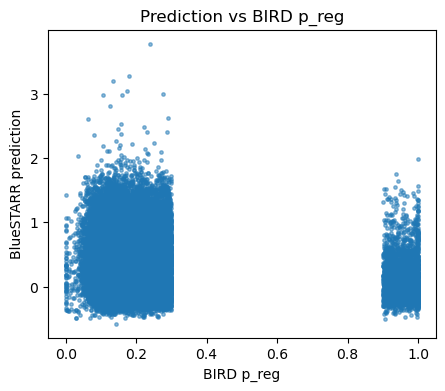

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(merged["p_reg"], merged["prediction"], s=6, alpha=0.5)
plt.xlabel("BIRD p_reg")
plt.ylabel("BlueSTARR prediction")
plt.title("Prediction vs BIRD p_reg")
plt.show()

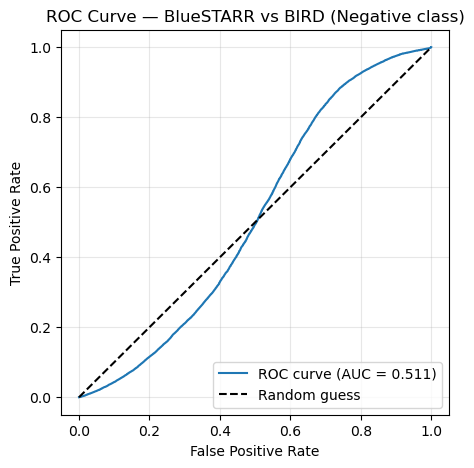

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# True labels and scores
y = merged["is_negative"].astype(int).values
scores = merged["prediction"].values  # because low prediction = more negative

# Compute ROC points
fpr, tpr, thresholds = roc_curve(y, scores)
auc_val = roc_auc_score(y, scores)

# Plot
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_val:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — BlueSTARR vs BIRD (Negative class)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()



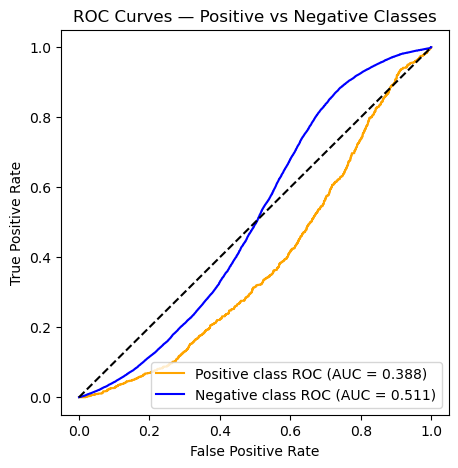

In [54]:
merged["is_positive"] = (merged["p_reg"] >= 0.7) & (merged["sum_input_counts"] > 100)
y_pos = merged["is_positive"].astype(int)
scores_pos = merged["prediction"]  # no negation here

fpr_pos, tpr_pos, _ = roc_curve(y_pos, scores_pos)
auc_pos = roc_auc_score(y_pos, scores_pos)

plt.figure(figsize=(5,5))
plt.plot(fpr_pos, tpr_pos, color='orange', label=f"Positive class ROC (AUC = {auc_pos:.3f})")
plt.plot(fpr, tpr, color='blue', label=f"Negative class ROC (AUC = {auc_val:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Positive vs Negative Classes")
plt.legend()
plt.show()


In [48]:
merged["is_active"] = (merged["p_reg"] >= 0.9).astype(int)
from sklearn.metrics import roc_auc_score
roc_auc_score(merged["is_active"], merged["prediction"])




0.3061714084648638

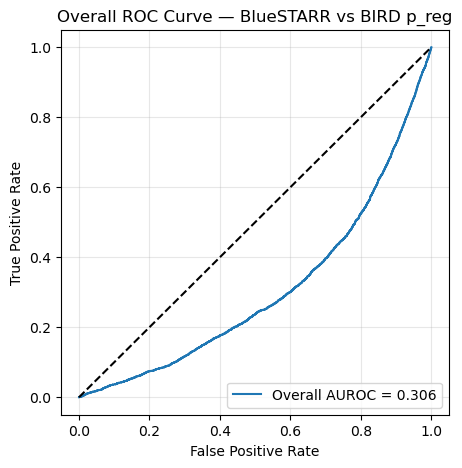

AUROC (whole dataset): 0.3062


In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Drop missing
df = merged.dropna(subset=["prediction", "p_reg"])

# Define binary label using all data (e.g. p_reg >= 0.5 = positive)
df["is_active"] = (df["p_reg"] >= 0.9).astype(int)

# True labels and scores
y = df["is_active"].values
scores = df["prediction"].values  # higher prediction = higher activation

# Compute ROC
fpr, tpr, _ = roc_curve(y, scores)
auc_all = roc_auc_score(y, scores)

# Plot
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"Overall AUROC = {auc_all:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve — BlueSTARR vs BIRD p_reg")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUROC (whole dataset): {auc_all:.4f}")
